In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ssa_functions import create_matrix
from ssa_functions import reconstruct_series
import sys
sys.path.append(sys.path[0][:-9] + "/common/")
import functions

data = pd.read_csv("data.csv", decimal = ',', sep = ';')
print("data shape" + str(data.shape))
X = create_matrix(data.to_numpy(), 16)
pd.DataFrame(X).to_excel("matrixes/X.xlsx")

data shape(48, 1)


In [3]:
# getting correlation matrix for X matrix
corr_x_matrix = np.corrcoef(np.transpose(X))
pd.DataFrame(corr_x_matrix).to_excel("matrixes/X_correlations.xlsx")

#getting own meanings
print(corr_x_matrix.shape)
c_L = functions.eig_matlab(corr_x_matrix)[0]
pd.DataFrame(c_L).to_excel("matrixes/corr_lambdas.xlsx")

# gerring number of values > 1
for i in range(c_L.shape[1]):
    if c_L[i,i] < 1:
        break

(33, 33)
/home/kfa/KFA/Programming/multivariate_statistical_analysis//common/functions.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  temp[i] = l


In [4]:
A = np.dot(X,np.transpose(X))
[L, V] = functions.eig_matlab(A)

V= V[:,0:i]

pd.DataFrame(V).to_excel("matrixes/vectors.xlsx")

X_n = np.dot(np.dot(V,np.transpose(V)), X)
pd.DataFrame(X_n).to_excel("matrixes/new_X_matrix.xlsx")

In [6]:
new_data = reconstruct_series(X_n)

print(new_data)

[301.317195249034, 309.22549189053353, 317.9368780646001, 324.48716107134555, 327.17370487605837, 324.0796946865002, 315.00620381500966, 304.12242824326, 294.23142246948765, 285.90124634073607, 281.63895120127023, 282.84902608358374, 289.66323200124094, 301.2770397911464, 315.2126386288579, 351.27843912563026, 363.0999087713613, 370.85927341502986, 373.7997692018307, 371.2712571934432, 365.98000786267744, 362.1786084016323, 362.54303639408437, 366.26920943837854, 367.33620200052457, 361.67880132104403, 349.00900109005477, 338.767702826591, 340.44703365382907, 355.9785431466009, 382.95895619484133, 417.25300307646916, 454.6101008797277, 460.46537364046924, 485.7136458850611, 491.2934943780739, 473.24919965885965, 437.4844273978348, 402.22089072522186, 382.2609217734848, 374.225645527741, 363.97784178667644, 351.2550501604131, 339.9961586470639, 338.4320801897619, 360.9972505390224, 401.8489195407857, 443.3441576766564]


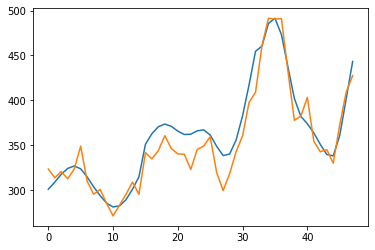

In [7]:
plt.plot(new_data)
plt.plot(data['y'])